**INTELIGÊNCIA ARTIFICIAL E COMPUTACIONAL**

Prof. Miguel Bozer da Silva - profmiguel.silva@fiap.com.br

In [ ]:
# Importando as bibliotecas necessárias
# Metricas usadas para comparacoes
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, plot_roc_curve, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Importando o modelo que sera utilizado
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

# Tratamento de dados
import pandas as pd
from collections import Counter

# Recebendo os dados

## Exercício: 
Receba os dados do link "https://drive.google.com/file/d/1Jjf3OnYm12rgABJe9dsMs5m_Xz5HNaSl/view?usp=sharing" e após isso faça a analise exploratória dos dados.

Os dados que vamos usar nessa aula estão disnponíveis em: https://www.openml.org/d/37

In [ ]:
# Seu Código Aqui

## Analise Exploratória dos Dados

In [ ]:
# Seu Código Aqui

# Correção

Daqui em diante temos a correção do exercicio anterior. Recomenda-se que utilize-se os dados processados na correção para o uso dos algoritmos de kNN e Regressão Logistica.

In [ ]:
# Recebendo os dados:

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd


data_google_id = '1Jjf3OnYm12rgABJe9dsMs5m_Xz5HNaSl'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a 
diabetes = pd.read_csv("dados.csv", sep = ',') 

## Analise Exploratória dos dados

In [ ]:
#visualização dos dados
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


Podemos notar que esse conjunto de dados possui as classes como tested_positive e tested_negative. Nosso objetivo será tentar encontrar relações entre as classes com os outros oito atributos e, a partir disso, tentar criar um modelo que consiga estimar se uma dada pessoa possui diabetes.

In [ ]:
# Verificando o tamanho dos dados
diabetes.shape

(768, 9)

In [ ]:
# Checando os tipos das variaveis envolvidas no nosso problema
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


Temos apenas um atributo categórico nos nossos dados, que seria o resultado dos exames, para positivo ou negativo. Vamos iniciar a nossa análise por esses dados:

In [ ]:
#explorar dados categoricos
#Genero
diabetes.groupby(['class']).size()

class
tested_negative    500
tested_positive    268
dtype: int64

As classes não estão balanceadas (50% para cada classe). Entretanto, não temos nenhum dado com alguma classe diferente dos valores que esperamos para elas.

Vamos agora analisar os atributos númericos:

In [ ]:
diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Podemos observar atributos com valores que chegam em torno de 1000 ("insu") e outros atributos que no máximo chegam a 2,42. Isso nos indica que precisamos normalizar ou padronizar os nossos dados.

Vamos analisar a distribuição dos nossos dados usando o método `hist()`. Dessa forma, vamos analisar todos os histogramas de uma só vez.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83fa58f810>,
      dtype=object)

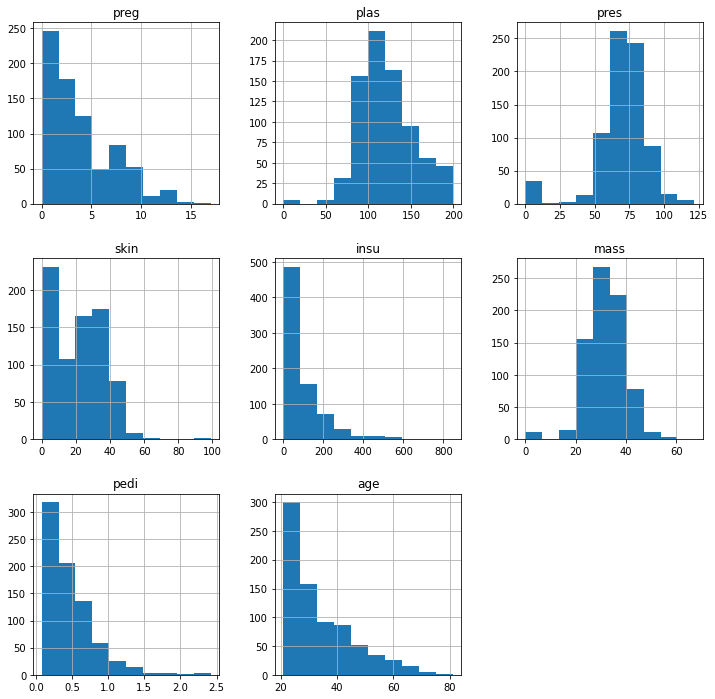

In [ ]:
diabetes.hist(figsize=(12,12))

Podemos ver que muitos atributos não seguem uma distribuição normal. Logo podemos descartar a padronização e considerar a normalização dos nossos dados.

É possível também notar pelos histogramas que existem alguns valores que estão distantes das medianas, indicando que possívelmente podem ser outliers.

Dessa forma, aAgora vamos analisar se encontramos a presença de algum outlier nos nossos dados:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'preg')

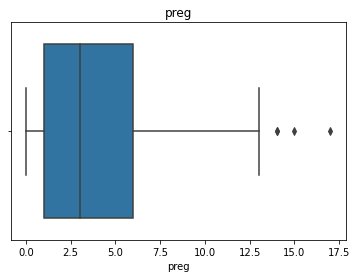

In [ ]:
import seaborn as srn

srn.boxplot(diabetes['preg']).set_title('preg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'plas')

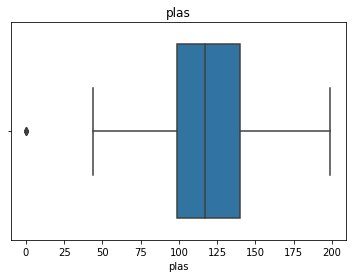

In [ ]:
srn.boxplot(diabetes['plas']).set_title('plas')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'pres')

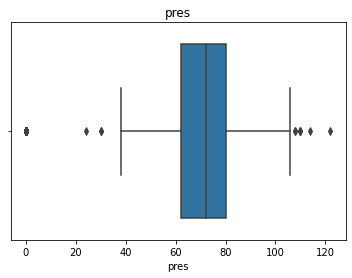

In [ ]:
srn.boxplot(diabetes['pres']).set_title('pres')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'skin')

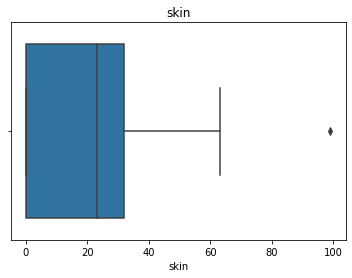

In [ ]:
srn.boxplot(diabetes['skin']).set_title('skin')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'insu')

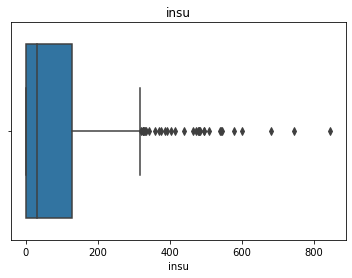

In [ ]:
srn.boxplot(diabetes['insu']).set_title('insu')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'mass')

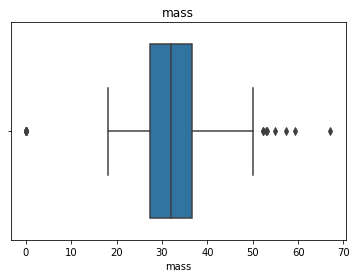

In [ ]:
srn.boxplot(diabetes['mass']).set_title('mass')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'pedi')

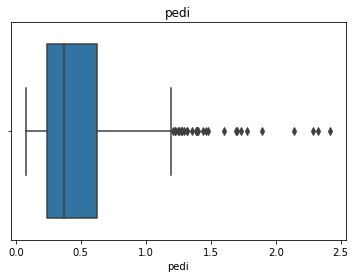

In [ ]:
srn.boxplot(diabetes['pedi']).set_title('pedi')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'age')

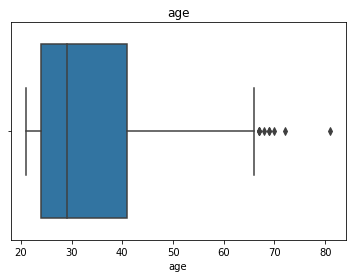

In [ ]:
srn.boxplot(diabetes['age']).set_title('age')

Podemos observar a presença de outliers em praticamente todos os atributos. Podemos agora tomar uma decisão de projeto para substituir esses valores pela mediana de cada atributo se eles estiverem acima ou abaixo dos limites inferiores ou superiores definidos pelo boxplot.

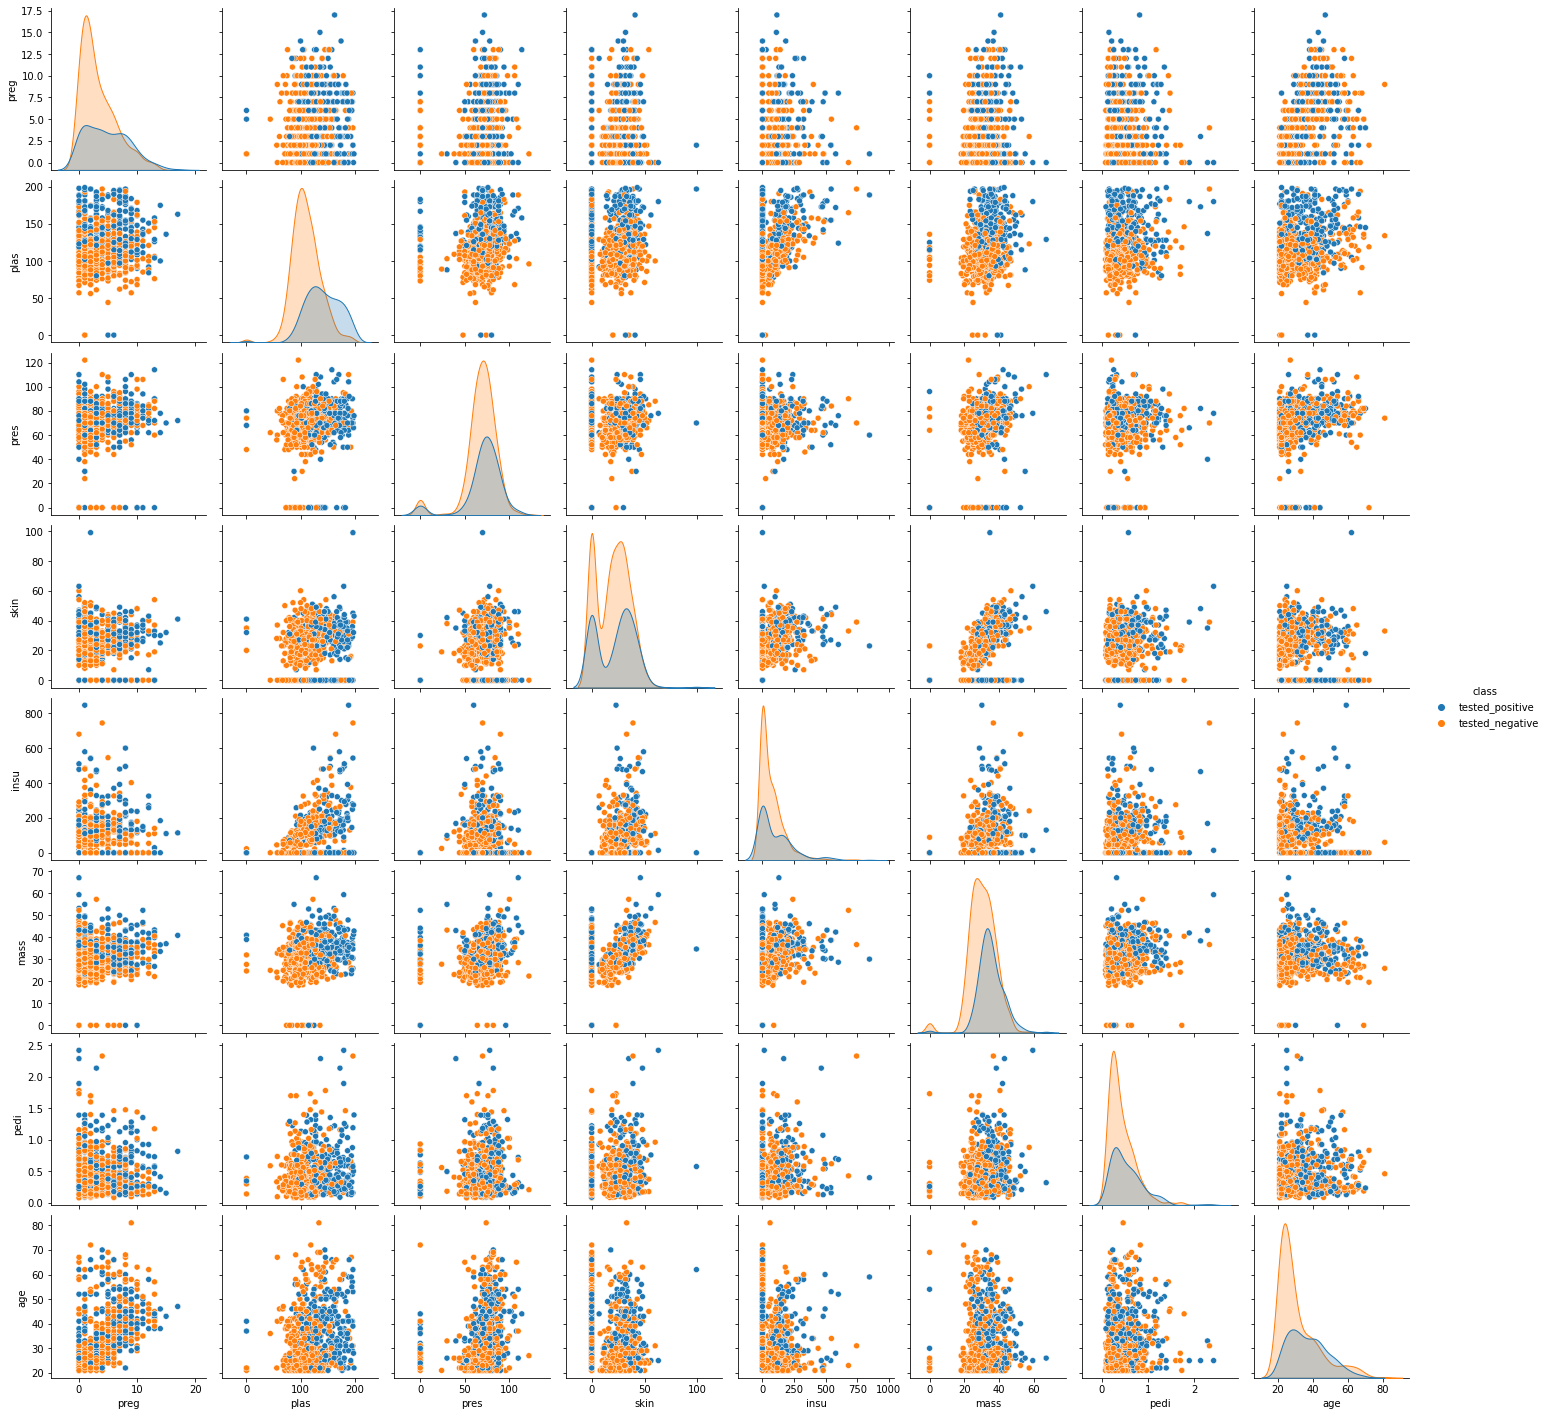

In [ ]:
sns.pairplot(diabetes, hue= 'class')



Com a analise dos gráficos acima podemos também perceber os diversos pontos de outliers nos diferentes atributos. Esse metodo pode ficar um pouco complexo para análise quando temos uma grande quantidade de atributos envolvidos no nosso projeto

In [ ]:
import numpy as np 

def ajuste_boxplot(data, colunas):
  
  # Criando uma cópia do DataFrame original
  # Dataframes atribuidos com o operador '=' compartilham os index e as informações armazenadas. Para evitar isso usamos o copy()
  dados = data.copy()
  
  for n in range(0, len(colunas)): # Percorrendo a lista das colunas
    # Recebendo os dois quartis de interesse
    quartis = np.quantile(dados[colunas[n]], [0.25,0.75])

    # Calculando os limites superiores e inferiores:
    limite_inferior = quartis[0] -1.5*(quartis[1]-quartis[0])
    limite_superior = quartis[1] +1.5*(quartis[1]-quartis[0])

    # Calculando o valor da mediana
    mediana = dados[colunas[n]].median()

    # Criando a mascara para filtrar os dados e imprimindo os valores que serão ajustados
    mask = (dados[colunas[n]] < limite_inferior) | (dados[colunas[n]] > limite_superior)
    print(f"A coluna {colunas[n]} possui {mask.sum()} outliers para serem tratados")
    
    # Substitui os valores pela mediana
    dados.loc[mask,colunas[n]] = mediana
    
    # Exibindo no console a quantidade de valores que foram tratados
    mask = (dados[colunas[n]] < limite_inferior) | (dados[colunas[n]] > limite_superior)
    print(f"A coluna {colunas[n]} possui {mask.sum()} outliers após serem tratados")

  return dados


In [ ]:
colunas_ajuste = list(diabetes.columns)
colunas_ajuste

['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']

Devemos tratar todos os *Outliers* do conjunto de dados com excessão da coluna `'class'`. Para isso vamos remover o valor `'class'` da nossa lista

In [ ]:
colunas_ajuste.remove('class')
colunas_ajuste

['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']

In [ ]:
diabetes[colunas_ajuste[0]]

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: preg, Length: 768, dtype: int64

In [ ]:
diabete_corr = diabetes.copy()

Agora iremos criar um conjunto de dados chamado `diabetes_corr` para não alterar os valores que recebemos do conjunto de dados original.

In [ ]:
diabete_corr = ajuste_boxplot(diabetes,colunas_ajuste)

A coluna preg possui 4 outliers para serem tratados
A coluna preg possui 0 outliers após serem tratados
A coluna plas possui 5 outliers para serem tratados
A coluna plas possui 0 outliers após serem tratados
A coluna pres possui 45 outliers para serem tratados
A coluna pres possui 0 outliers após serem tratados
A coluna skin possui 1 outliers para serem tratados
A coluna skin possui 0 outliers após serem tratados
A coluna insu possui 34 outliers para serem tratados
A coluna insu possui 0 outliers após serem tratados
A coluna mass possui 19 outliers para serem tratados
A coluna mass possui 0 outliers após serem tratados
A coluna pedi possui 29 outliers para serem tratados
A coluna pedi possui 0 outliers após serem tratados
A coluna age possui 9 outliers para serem tratados
A coluna age possui 0 outliers após serem tratados


Checando se temos algum valor nulo no nosso conjunto de dados:

In [ ]:
diabete_corr.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Não temos nenhum valor nulo e nem a necessidade de tratar dados categóricos, uma vez que os algoritmos de IA que iremos usar permitem que os nossos dados de saída sejam categóricos.

# Aplicando IA aos nossos dados

Após a análise exploratória dos nossos dados podemos iniciar a aplicação de um algoritmo de machine learning para aprendermos as relações das entradas com a saída do problema que estamos estudando.

In [ ]:
# Vendo a distribuição das classes
diabetes.groupby("class").size()

class
tested_negative    500
tested_positive    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83f24a3150>,
      dtype=object)

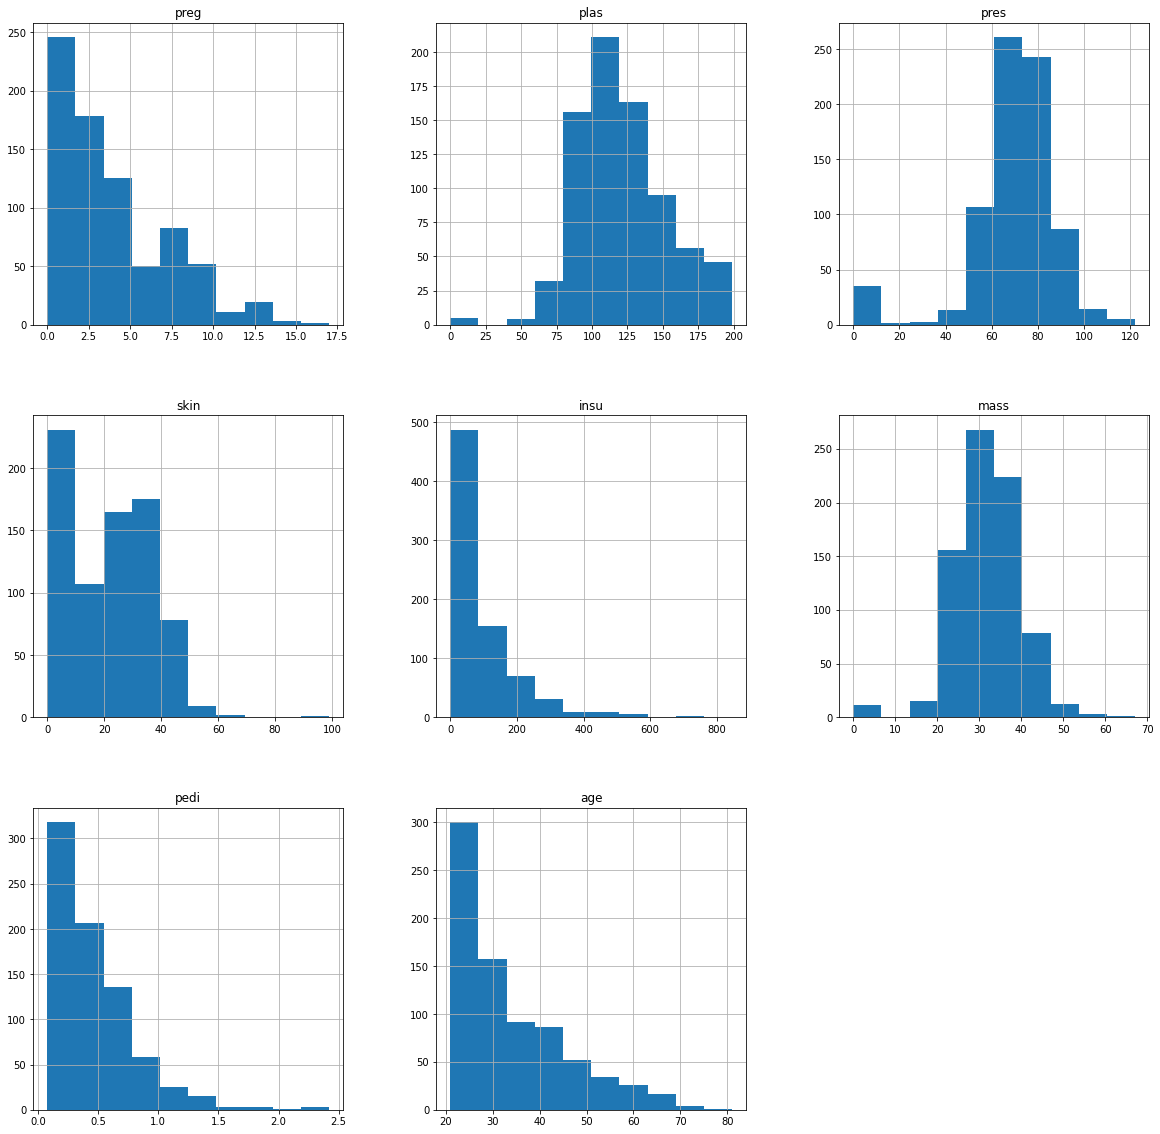

In [ ]:
diabetes.hist(figsize=(20,20))

Vamos começar separando e ajustando as escalas dos nossos dados:

In [ ]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
# Separando os dados de entrada e de saída
X = diabetes.drop(columns=["class"])
Y = diabetes["class"]

# Dividindo os dados no conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Aplicando a padronizacao
# levantando os minimos e maximos
scaler = MinMaxScaler().fit(X_train)
# Mudando a escala dos dados
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

Verificando os resultados obtidos:

In [ ]:
X_train.head()

,preg,plas,pres,skin,insu,mass,pedi,age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


In [ ]:
A= pd.DataFrame(x_train_scaled)
A.head()

,0,1,2,3,4,5,6,7
0,0.058824,0.477387,0.491803,0.285714,0.068558,0.356185,0.077711,0.016667
1,0.294118,0.527638,0.590164,0.460317,0.384161,0.549925,0.034586,0.116667
2,0.000000,0.678392,0.557377,0.666667,0.295508,0.630402,0.122545,0.050000
3,0.235294,0.658291,0.557377,0.333333,0.196217,0.493294,0.035013,0.116667
4,0.058824,0.517588,0.245902,0.603175,0.098109,0.645306,0.044833,0.200000


In [ ]:
X_train.shape

(537, 8)

In [ ]:
X_test.shape

(231, 8)

In [ ]:
X.shape

(768, 8)

## Criando o modelo de regressão logistica

In [ ]:
# Fazendo a regressao logistica
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

# Fazendo as predições
y_pred = log_reg.predict(x_test_scaled)

In [ ]:
# Checando 20 primeiras saidas das previsoes
y_pred[:20]

array(['tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative'], dtype=object)

In [ ]:
# Checando as 20 primeiras saidas dos labels
y_test[:20]

668    tested_negative
324    tested_negative
624    tested_negative
690    tested_negative
473    tested_negative
204    tested_negative
97     tested_negative
336    tested_negative
568    tested_negative
148    tested_negative
667    tested_positive
212    tested_negative
199    tested_positive
265    tested_negative
760    tested_negative
356    tested_positive
501    tested_negative
457    tested_negative
604    tested_positive
213    tested_positive
Name: class, dtype: object

In [ ]:
# Comparando usando o DataFrame
pd.DataFrame({'pred': y_pred, 'resp': y_test})

,pred,resp
668,tested_negative,tested_negative
324,tested_negative,tested_negative
624,tested_negative,tested_negative
690,tested_negative,tested_negative
473,tested_negative,tested_negative
...,...,...
619,tested_negative,tested_positive
198,tested_negative,tested_positive
538,tested_negative,tested_negative
329,tested_negative,tested_negative


In [ ]:
# Acuracia para o nosso modelo
accuracy_score(y_test, y_pred)

0.7445887445887446

## Criando o modelo k-NN

In [ ]:
# Fazendo o k-NN
# n_neighbors é o valor da quantidade de vizinhos que será considerada
knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(x_train_scaled, y_train)

# Fazendo as predições
y_pred_knn = knn_clf.predict(x_test_scaled)

In [ ]:
# Comparando usando o DataFrame
pd.DataFrame({'pred-kNN': y_pred_knn, 'resp': y_test})

,pred-kNN,resp
668,tested_negative,tested_negative
324,tested_negative,tested_negative
624,tested_negative,tested_negative
690,tested_negative,tested_negative
473,tested_negative,tested_negative
...,...,...
619,tested_negative,tested_positive
198,tested_negative,tested_positive
538,tested_negative,tested_negative
329,tested_negative,tested_negative


In [ ]:
# Acuracia para o nosso modelo
accuracy_score(y_test, y_pred_knn)

0.7316017316017316

Os dois modelos obtiveram desempenhos próximos de acurácia. Se fossemos escolher apenas analisando essa métrica escolheriamos a Regressão Logística por possuir a melhor métrica de desempenho.

Nosso próximo assunto será abordar outras métricas de desempenho que podem ser levadas em consideração na escolha do melhor modelo.

## Métricas de Desempenho

### Analisando o modelo da **regressão logistica**:

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = ['tested_positive','tested_negative'])
cm

array([[ 45,  35],
       [ 24, 127]])

<Figure size 1080x360 with 0 Axes>

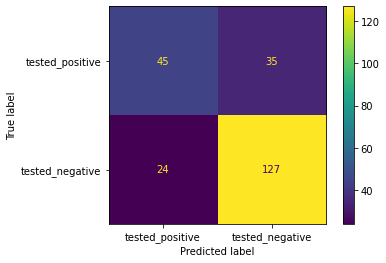

In [ ]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['tested_positive','tested_negative'])
disp.plot(values_format='d') 

Começando com a precisão:

$precisao = \frac{TP}{TP+FP}$

In [ ]:
# Calculando a precisão para o "tested negative"
precision_score(y_test, y_pred, pos_label='tested_positive')

0.6521739130434783

In [ ]:
# Precisao para o nosso modelo
precisao = 45/(45+24)
precisao

0.6521739130434783

Calculando a revocação:

$revocacao = \frac{TP}{TP+FN}$

In [ ]:
recall_score(y_test, y_pred, pos_label='tested_positive')

0.5625

In [ ]:
# revocacao para o nosso modelo
revocacao = 45/(45+35)
revocacao

0.5625

Calculando o f1 score:

$F_{1} = 2\times\frac{precisao \times revocacao}{precisao + revocacao}$

In [ ]:
f1_score(y_test, y_pred, pos_label='tested_positive')

0.6040268456375839

In [ ]:
# f1 score para o nosso modelo
f1 = 2*(precisao*revocacao)/(precisao+revocacao)
f1

0.6040268456375839

Calculando a acurácia:

$acuracia = \frac{TP+TN}{TP+TN+FP+FN}$

In [ ]:
# Acuracia para o nosso modelo
accuracy_score(y_test, y_pred)

0.7445887445887446

In [ ]:
# Comparando com o que vimos em aula
acuracia = (127+45)/(127+24+35+45)
acuracia

0.7445887445887446

In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

tested_negative       0.78      0.84      0.81       151
tested_positive       0.65      0.56      0.60        80

       accuracy                           0.74       231
      macro avg       0.72      0.70      0.71       231
   weighted avg       0.74      0.74      0.74       231



### Analisando o modelo de **k-NN**:

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn, labels = ['tested_positive','tested_negative'])
cm_knn

array([[ 41,  39],
       [ 25, 126]])

<Figure size 1080x360 with 0 Axes>

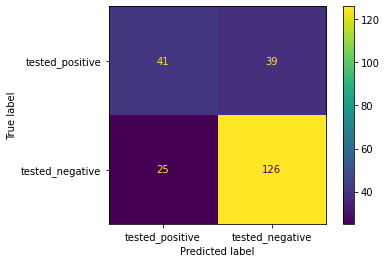

In [ ]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_knn, display_labels=['tested_positive','tested_negative'])
disp.plot(values_format='d') 

Começando com a precisão:

$precisao = \frac{TP}{TP+FP}$

In [ ]:
# Calculando a precisão para o "tested negative"
precision_score(y_test, y_pred_knn, pos_label='tested_positive')

0.6212121212121212

In [ ]:
# Precisao para o nosso modelo
precisao = 41/(41+25)
precisao

0.6212121212121212

Calculando a revocação:

$revocacao = \frac{TP}{TP+FN}$

In [ ]:
recall_score(y_test, y_pred_knn, pos_label='tested_positive')

0.5125

In [ ]:
# revocacao para o nosso modelo
revocacao = 41/(41+39)
revocacao

0.5125

Calculando o f1 score:

$F_{1} = 2\times\frac{precisao \times revocacao}{precisao + revocacao}$

In [ ]:
f1_score(y_test, y_pred_knn, pos_label='tested_positive')

0.5616438356164383

In [ ]:
# f1 score para o nosso modelo
f1 = 2*(precisao*revocacao)/(precisao+revocacao)
f1

0.5616438356164383

Calculando a acurácia:

$acuracia = \frac{TP+TN}{TP+TN+FP+FN}$

In [ ]:
# Acuracia para o nosso modelo
accuracy_score(y_test, y_pred_knn)

0.7229437229437229

In [ ]:
# Comparando com o que vimos em aula
acuracia = (126+41)/(126+25+39+41)
acuracia

0.7229437229437229

In [ ]:
print(classification_report(y_test, y_pred_knn))

                 precision    recall  f1-score   support

tested_negative       0.76      0.83      0.80       151
tested_positive       0.62      0.51      0.56        80

       accuracy                           0.72       231
      macro avg       0.69      0.67      0.68       231
   weighted avg       0.71      0.72      0.72       231



## Comparando os modelos com a curva ROC

In [ ]:
# Primeiro vamos levar o valor das probabilidades, isto é, os valores sem aplicarmos a classificacao.
y_score_reglog = log_reg.predict_proba(x_test_scaled)[:,1]
# Calculando o valor da AUC para o nosso modelo
roc_auc = roc_auc_score(y_test,y_score_reglog)
roc_auc

0.7964403973509934

In [ ]:
# Primeiro vamos levar o valor das probabilidades, isto é, os valores sem aplicarmos a classificacao.
y_score_knn = knn_clf.predict_proba(x_test_scaled)[:,1]
# Calculando o valor da AUC para o nosso modelo
roc_auc_knn = roc_auc_score(y_test,y_score_knn)
roc_auc_knn

0.7732201986754966

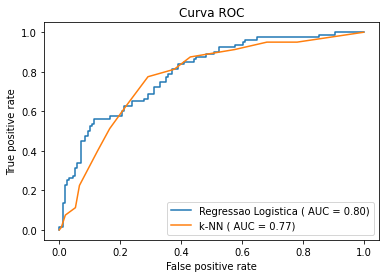

In [ ]:
# Para plotar a curva ROC com ambos modelos vamos usar o RocCurveDisplay

# cuidado com o pos_label, se você colocar da classe negativa a curva ROC vai ficar invertida. Sempre analisar visualmente a imagem e o AUC
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_score_reglog, pos_label='tested_positive')
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_score_knn, pos_label='tested_positive')

# plotando o grafico
plt.figure()
plt.plot(fpr_log, tpr_log, label='%s ( AUC = %0.2f)' % ('Regressao Logistica', roc_auc))
plt.plot(fpr_knn, tpr_knn, label='%s ( AUC = %0.2f)' % ('k-NN', roc_auc_knn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

# **Exercício 1)** Use a base de dados ID=251  do  OpenML. Usando um test_size de 20% e os classificadores de Regressão Logistica e k-NN, obtenha a matriz de confusão. Calcule a Precisão, Recall, F1 score e Acurácia e diga qual classificador você acredita ser melhor.

In [ ]:
# Carregamento de dados do OpenML
from sklearn.datasets import fetch_openml


# Vamos carregar dados publicos
cancer = fetch_openml(data_id=251)
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
df = pd.concat([df,cancer.target], axis = 1)

In [ ]:
df.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,7.581819,9.745087,1.000000,4.503410,7.039930,10.0,4.412282,10.000000,5.055266,malignant
1,5.210921,8.169596,7.841875,6.033275,4.269619,10.0,4.236312,4.845350,1.000000,malignant
2,4.000000,4.594296,2.330380,2.000000,3.000000,1.0,10.701823,1.101305,1.000000,benign
3,2.428871,1.000000,1.000000,1.000000,4.099291,1.0,2.000000,1.000000,1.000000,benign
4,8.855971,2.697539,6.047068,3.301891,3.000000,1.0,5.297592,4.104791,3.115741,malignant


In [ ]:
cancer.target

0        malignant
1        malignant
2           benign
3           benign
4        malignant
           ...    
39361    malignant
39362       benign
39363    malignant
39364       benign
39365    malignant
Name: Class, Length: 39366, dtype: category
Categories (2, object): ['benign', 'malignant']

In [ ]:
df.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,7.581819,9.745087,1.000000,4.503410,7.039930,10.0,4.412282,10.000000,5.055266,malignant
1,5.210921,8.169596,7.841875,6.033275,4.269619,10.0,4.236312,4.845350,1.000000,malignant
2,4.000000,4.594296,2.330380,2.000000,3.000000,1.0,10.701823,1.101305,1.000000,benign
3,2.428871,1.000000,1.000000,1.000000,4.099291,1.0,2.000000,1.000000,1.000000,benign
4,8.855971,2.697539,6.047068,3.301891,3.000000,1.0,5.297592,4.104791,3.115741,malignant
